## This notebook examines the relationship between crime rate and the number of new restaurants in an area, which we consider to be a metric of gentrification. We use the number of "pre-permit" food safety inspections as a proxy for the number of new restaurants.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 30

### Restaurants

In [2]:
# Read PySpark restaurants output file into a Pandas dataframe
restaurants = pd.read_csv('new_restaurants_by_boro_year.out', names=['Boro', 'Year', 'Restaurants'])

# Strip whitespace and punctuation
for c in restaurants.columns:
    restaurants[c] = restaurants[c].apply(lambda x: str(x).strip().strip(r"[()']*"))
    if c!='Boro':
        restaurants[c] = restaurants[c].astype(int)

# Ignore rows with only 1 count
restaurants = restaurants[restaurants['Restaurants']>1]

# Ignore years after 2015
# (To be consistent with crime data)
restaurants = restaurants[restaurants['Year']<=2015]

# Compile list of years for which we have restaurant data
# (Conveniently, we have the same years for all boroughs)
years = restaurants['Year'].unique()

# Re-index by year and borough
restaurants = restaurants.set_index(['Year','Boro'])

display(restaurants)

,,Restaurants
Year,Boro,
2013,BRONX,47
2014,BRONX,231
2015,BRONX,256
2013,BROOKLYN,145
2014,BROOKLYN,604
2015,BROOKLYN,741
2013,MANHATTAN,233
2014,MANHATTAN,905
2015,MANHATTAN,1043


### Felonies

In [3]:
# Read PySpark felonies output file into a Pandas dataframe
felonies = pd.read_csv('../felonies/output/felony_count_by_borough_year.out', names=['Boro', 'Felonies'])

felonies_split = felonies['Boro'].apply(lambda x: str(x).split('_'))
felonies['Boro'] = [x[0] for x in felonies_split]
felonies['Year'] = [x[1] for x in felonies_split]

# Strip whitespace and punctuation
for c in felonies.columns:
    felonies[c] = felonies[c].apply(lambda x: str(x).strip().strip(r"[()']*"))
    if c!='Boro':
        felonies[c] = felonies[c].astype(int)

# Reorder columns for display purposes
felonies = felonies[['Boro', 'Year', 'Felonies']]
        
# Ignore rows with unknown/null borough  
felonies = felonies[felonies['Boro']!='']

# Ignore years for which we don't have restaurant data
felonies = felonies[felonies['Year'].isin(years)]

# Re-index by year and borough
felonies = felonies.set_index(['Year', 'Boro'])

display(felonies)

,,Felonies
Year,Boro,
2013,BRONX,28541
2014,BRONX,28538
2015,BRONX,30063
2013,BROOKLYN,50268
2014,BROOKLYN,49554
2015,BROOKLYN,47942
2013,MANHATTAN,36334
2014,MANHATTAN,34575
2015,MANHATTAN,35972


,Year,Boro,Felonies,Restaurants
0,2013,BRONX,28541,47
3,2013,BROOKLYN,50268,145
6,2013,MANHATTAN,36334,233
9,2013,QUEENS,34325,89
12,2013,STATEN ISLAND,5186,19
1,2014,BRONX,28538,231
4,2014,BROOKLYN,49554,604
7,2014,MANHATTAN,34575,905
10,2014,QUEENS,33405,616
13,2014,STATEN ISLAND,5137,77


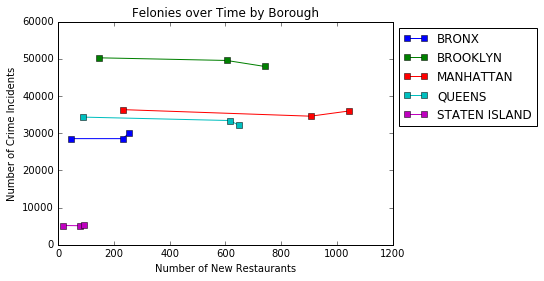

In [4]:
df = pd.concat([felonies, restaurants], axis=1, join='inner').reset_index().sort_values('Year')
display(df)
for boro in df['Boro'].unique():
    data = df[df['Boro']==boro]
    plt.plot(data['Restaurants'], data['Felonies'], marker='s', label=boro)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.ylabel('Number of Crime Incidents')
plt.xlabel('Number of New Restaurants')
plt.title('Felonies over Time by Borough')
plt.show()

In [5]:
df['Restaurants'] = df['Restaurants'] - np.mean(df['Restaurants']) # Center Restaurants variable
model = smf.ols(formula='Felonies ~ C(Boro) + C(Year) + Restaurants', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Felonies   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     582.6
Date:                Tue, 09 May 2017   Prob (F-statistic):           3.87e-09
Time:                        22:06:52   Log-Likelihood:                -117.11
No. Observations:                  15   AIC:                             250.2
Df Residuals:                       7   BIC:                             255.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

C:\Users\Julie\Anaconda2\envs\py27\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


### Misdemeanors

In [6]:
# Read PySpark misdemeanors output file into a Pandas dataframe
misdemeanors = pd.read_csv('../misdemeanors/output/misdemeanor_count_by_borough_year.out', names=['Boro', 'Misdemeanors'])

misdemeanors_split = misdemeanors['Boro'].apply(lambda x: str(x).split('_'))
misdemeanors['Boro'] = [x[0] for x in misdemeanors_split]
misdemeanors['Year'] = [x[1] for x in misdemeanors_split]

# Strip whitespace and punctuation
for c in misdemeanors.columns:
    misdemeanors[c] = misdemeanors[c].apply(lambda x: str(x).strip().strip(r"[()']*"))
    if c!='Boro':
        misdemeanors[c] = misdemeanors[c].astype(int)

# Reorder columns for display purposes
misdemeanors = misdemeanors[['Boro', 'Year', 'Misdemeanors']]
        
# Ignore rows with unknown/null borough  
misdemeanors = misdemeanors[misdemeanors['Boro']!='']

# Ignore years for which we don't have restaurant data
misdemeanors = misdemeanors[misdemeanors['Year'].isin(years)]

# Re-index by year and borough
misdemeanors = misdemeanors.set_index(['Year', 'Boro'])

display(misdemeanors)

,,Misdemeanors
Year,Boro,
2013,BRONX,63452
2014,BRONX,64367
2015,BRONX,61570
2013,BROOKLYN,82029
2014,BROOKLYN,79503
2015,BROOKLYN,75330
2013,MANHATTAN,70238
2014,MANHATTAN,66385
2015,MANHATTAN,64365


,Year,Boro,Misdemeanors,Restaurants
0,2013,BRONX,63452,47
3,2013,BROOKLYN,82029,145
6,2013,MANHATTAN,70238,233
9,2013,QUEENS,54682,89
12,2013,STATEN ISLAND,13366,19
1,2014,BRONX,64367,231
4,2014,BROOKLYN,79503,604
7,2014,MANHATTAN,66385,905
10,2014,QUEENS,53604,616
13,2014,STATEN ISLAND,13327,77


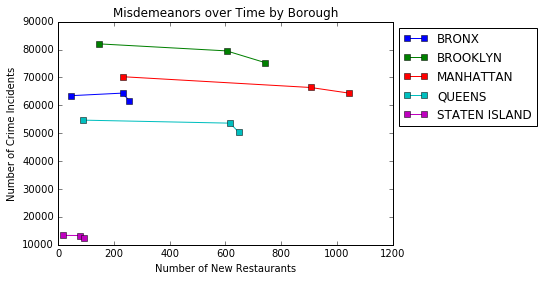

In [7]:
df = pd.concat([misdemeanors, restaurants], axis=1, join='inner').reset_index().sort_values('Year')
display(df)
for boro in df['Boro'].unique():
    data = df[df['Boro']==boro]
    plt.plot(data['Restaurants'], data['Misdemeanors'], marker='s', label=boro)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.ylabel('Number of Crime Incidents')
plt.xlabel('Number of New Restaurants')
plt.title('Misdemeanors over Time by Borough')
plt.show()

In [8]:
df['Restaurants'] = df['Restaurants'] - np.mean(df['Restaurants']) # Center Restaurants variable
model = smf.ols(formula='Misdemeanors ~ C(Boro) + C(Year) + Restaurants', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Misdemeanors   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1711.
Date:                Tue, 09 May 2017   Prob (F-statistic):           8.96e-11
Time:                        22:06:52   Log-Likelihood:                -115.86
No. Observations:                  15   AIC:                             247.7
Df Residuals:                       7   BIC:                             253.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

### Violations

In [9]:
# Read PySpark violations output file into a Pandas dataframe
violations = pd.read_csv('../violations/output/violation_count_by_borough_year.out', names=['Boro', 'Violations'])

violations_split = violations['Boro'].apply(lambda x: str(x).split('_'))
violations['Boro'] = [x[0] for x in violations_split]
violations['Year'] = [x[1] for x in violations_split]

# Strip whitespace and punctuation
for c in violations.columns:
    violations[c] = violations[c].apply(lambda x: str(x).strip().strip(r"[()']*"))
    if c!='Boro':
        violations[c] = violations[c].astype(int)

# Reorder columns for display purposes
violations = violations[['Boro', 'Year', 'Violations']]
        
# Ignore rows with unknown/null borough  
violations = violations[violations['Boro']!='']

# Ignore years for which we don't have restaurant data
violations = violations[violations['Year'].isin(years)]

# Re-index by year and borough
violations = violations.set_index(['Year', 'Boro'])

display(violations)

,,Violations
Year,Boro,
2013,BRONX,12504
2014,BRONX,13032
2015,BRONX,13366
2013,BROOKLYN,18040
2014,BROOKLYN,19780
2015,BROOKLYN,19990
2013,MANHATTAN,11618
2014,MANHATTAN,12300
2015,MANHATTAN,12781


,Year,Boro,Violations,Restaurants
0,2013,BRONX,12504,47
3,2013,BROOKLYN,18040,145
6,2013,MANHATTAN,11618,233
9,2013,QUEENS,12477,89
12,2013,STATEN ISLAND,4108,19
1,2014,BRONX,13032,231
4,2014,BROOKLYN,19780,604
7,2014,MANHATTAN,12300,905
10,2014,QUEENS,13416,616
13,2014,STATEN ISLAND,4396,77


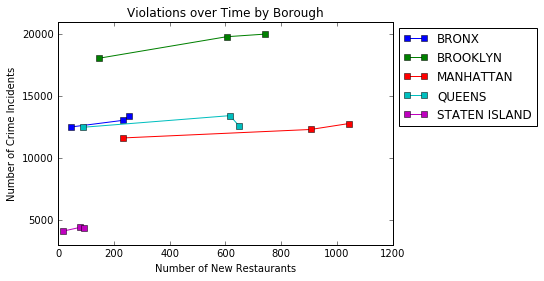

In [10]:
df = pd.concat([violations, restaurants], axis=1, join='inner').reset_index().sort_values('Year')
display(df)
for boro in df['Boro'].unique():
    data = df[df['Boro']==boro]
    plt.plot(data['Restaurants'], data['Violations'], marker='s', label=boro)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.ylim([3000, 21000])
plt.ylabel('Number of Crime Incidents')
plt.xlabel('Number of New Restaurants')
plt.title('Violations over Time by Borough')
plt.show()

In [11]:
df['Restaurants'] = df['Restaurants'] - np.mean(df['Restaurants']) # Center Restaurants variable
model = smf.ols(formula='Violations ~ C(Boro) + C(Year) + Restaurants', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Violations   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     289.0
Date:                Tue, 09 May 2017   Prob (F-statistic):           4.45e-08
Time:                        22:06:53   Log-Likelihood:                -105.88
No. Observations:                  15   AIC:                             227.8
Df Residuals:                       7   BIC:                             233.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               